In [1]:
import numpy as np
import math
from scipy import optimize
from sympy import Symbol
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data_Henry = pd.read_excel(r'Data_Henry_H2O.xlsx', index_col = 0)

In [15]:
data_surface = pd.read_excel(r'Data_surface_area.xlsx', index_col = 0)

In [16]:
data_surface['henry_coefficient_H2O_298K [mol/kg/bar]'] = data_Henry['henry_coefficient_H2O_298K [mol/kg/bar]']

In [17]:
data_surface

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,jml_nn_93,jml_nn_94,jml_nn_95,jml_nn_96,jml_nn_97,jml_nn_98,jml_nn_99,jml_nn_100,surface_area [m^2/g],henry_coefficient_H2O_298K [mol/kg/bar]
MOFname,,,,,,,,,,,,,,,,,,,,,
str_m2_o10_o11_pcu_sym.170.cif,1487.894800,1537.832350,5.089800,-10.370148,0.0,9.166693,2.200000,198.851928,49.136553,-1053.126,...,6.418605,5.953488,7.860465,7.023256,7.534884,5.813953,8.000000,6.790698,710.60,60398.700
str_m2_o10_o13_pcu_sym.103.cif,1359.557333,1401.174827,5.574833,-11.397623,0.0,11.256410,2.333333,248.704848,44.199160,-941.665,...,6.826087,6.260870,7.173913,7.739130,6.086957,5.913043,7.130435,6.826087,872.95,34614.400
str_m2_o10_o13_pcu_sym.108.cif,1487.894800,1537.832350,5.089800,-10.370148,0.0,9.166693,2.200000,198.851928,49.136553,-1053.126,...,7.590909,6.909091,5.590909,6.681818,7.000000,6.136364,6.136364,5.590909,1113.81,7214.020
str_m2_o10_o13_pcu_sym.12.cif,1487.894800,1537.832350,5.089800,-10.370148,0.0,9.166693,2.200000,198.851928,49.136553,-1053.126,...,7.000000,7.142857,6.857143,6.571429,6.333333,5.809524,7.809524,7.809524,1373.56,1004.230
str_m2_o10_o13_pcu_sym.130.cif,1359.557333,1401.174827,5.574833,-11.397623,0.0,11.256410,2.333333,248.704848,44.199160,-941.665,...,7.521739,6.913043,6.478261,6.695652,6.478261,6.086957,5.695652,6.565217,824.00,42368.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
str_m7_o9_o13_bcu_sym.56.cif,1484.114800,1535.040110,4.936200,-9.503628,0.0,8.213489,2.200000,185.847417,49.156926,-1127.172,...,5.250000,5.737500,5.450000,5.387500,5.462500,6.275000,6.412500,6.162500,1973.67,8150.990
str_m7_o9_o13_bcu_sym.59.cif,1481.793800,1534.006180,6.386200,-11.335429,0.2,8.052340,2.200000,172.853924,51.854321,-1126.818,...,5.658537,5.207317,5.524390,5.865854,6.207317,6.219512,6.792683,6.597561,1677.87,636.253
str_m7_o9_o13_bcu_sym.77.cif,1841.613500,1896.249587,5.112750,-12.219685,0.0,9.671524,2.250000,162.871875,33.229453,-1396.015,...,6.170732,5.987805,5.597561,5.280488,6.195122,6.475610,6.731707,6.524390,1776.16,1033.610


In [54]:
R=8.314472e-3

#OPERATIVE CONDITIONS
Ta = 273 + 80            #High isotherm (K), source T
Tb = 273 + 35            #Low isotherm (K), user T
Tinv = 5                 #Winter temperature (Celsius)
Test = 30              #Summer temperature (Celsius)

Beta = 3.4

#Antoine Equation
A = 8.07131
B = 1730.63
C = 233.426

T = 298

logp0 = A-B/(C+T-273)
p0 = (10**logp0)*133.32
logpe=A-B/(C+Tinv);
pe=(10**logpe)*133.32; # Pascal
logpc=A-B/(C+Test);
pc=(10**logpc)*133.32; # Pascal
logpa = A-B/(C+80)
pa = (10**logpa)*133.32
logpb = A-B/(C+35)
pb = (10**logpb)*133.32
PM_H2O = 18.02

pressure_0 = np.linspace(1e-4, p0, 500)

A = R*T*np.log(p0/pressure_0)

pressure_a = pa*np.exp(-A/(R*Ta))
pressure_b = pb*np.exp(-A/(R*Tb))

const = 0.0003875

In [20]:
shap1 = np.zeros(len(data_surface))
shap2 = np.zeros(len(data_surface))
objective_function = np.zeros(len(data_surface))

import tqdm
for j in tqdm.tqdm(range(len(data_surface))):

    # MATERIALS PROPERTIES
    H = data_surface['henry_coefficient_H2O_298K [mol/kg/bar]'].values[j]
    Cap = data_surface['surface_area [m^2/g]'].values[j]

    H = H*PM_H2O*1e-8/(const*Cap)

    tetaH = np.zeros(max(np.shape(pressure_0)))
    
    def fun(x):
        return x - (H*math.exp(Beta*x)*pressure_0[i]/(1+H*math.exp(Beta*x)*pressure_0[i]))
    for i in range(max(np.shape(pressure_0))):
        x = Symbol('x')
        tetaH[i] = optimize.newton_krylov(fun, 0.5)
    
    xxe = np.argwhere(pressure_b > pe)
    xxc = np.argwhere(pressure_a > pc)
    Dteta = tetaH[xxe[0][0]] - tetaH[xxc[0][0]]
    
    q_st_04 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.4))]/pressure_b[np.argmin(abs(tetaH-0.4))])/(1/Tb - 1/Ta)
    q_st_05 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.5))]/pressure_b[np.argmin(abs(tetaH-0.5))])/(1/Tb - 1/Ta)
    q_st_06 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.6))]/pressure_b[np.argmin(abs(tetaH-0.6))])/(1/Tb - 1/Ta)
    q_st = (q_st_04 + q_st_05 + q_st_06)/3
    
    
    objective_function[j] = Dteta * q_st * Cap 
    shap1[j] = data_surface['jml_C-14'][j]
    shap2[j] = data_surface['jml_rdf_38'][j]

 82%|████████▏ | 4121/5028 [32:32<07:54,  1.91it/s] C:\Users\giovanni\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:475: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))
100%|██████████| 5028/5028 [41:05<00:00,  2.04it/s]


In [21]:
np.max(objective_function)

131620.21118745857

In [22]:
np.argmax(objective_function)

4354

In [23]:
A = np.zeros([len(shap1), 3])
A[:, 0] = shap1
A[:, 1] = shap2
A[:, 2] = objective_function*0.0003875/18.02*0.001

In [24]:
B = pd.DataFrame({
    'col1': shap1,
    'col2': shap2,
    'col3': objective_function*0.0003875/18.02*0.001
})

In [25]:
C = B.sort_values('col3')
D = C

In [35]:
D.iloc[-10:]

,col1,col2,col3
4739,85.85,0.9923,0.002191
4778,69.74,1.4695,0.002217
4789,85.85,1.2897,0.002221
4783,69.74,1.3792,0.002307
4781,85.85,1.5552,0.002336
4772,69.74,1.3666,0.002364
4749,85.85,1.2220,0.002397
4748,85.85,1.2314,0.002439
4647,69.74,1.3842,0.002569
4354,69.74,2.1974,0.002830


In [27]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


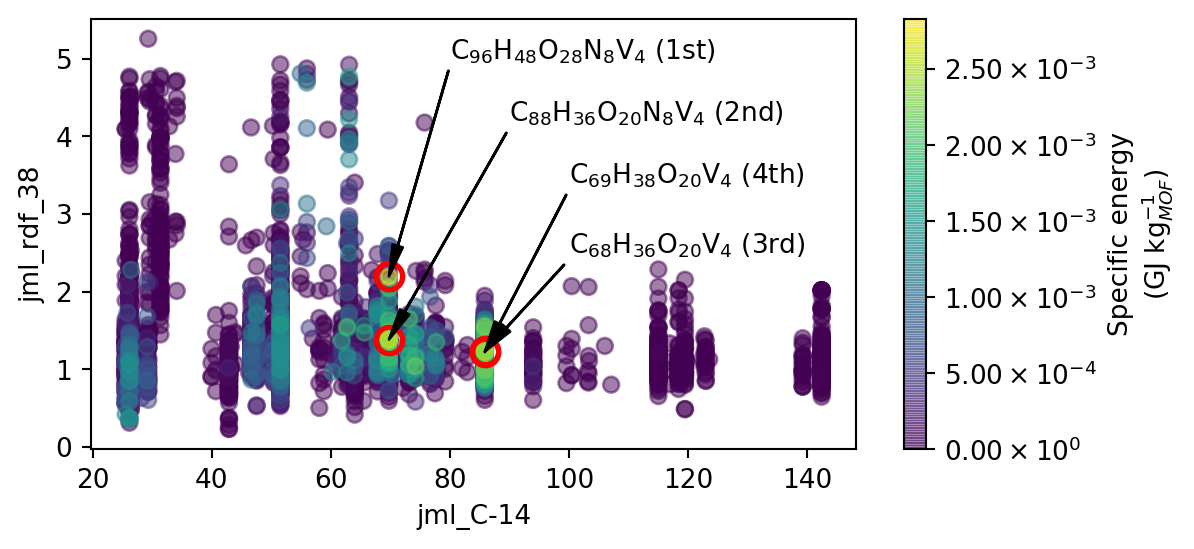

In [36]:
fig, ax = plt.subplots(figsize=(6.5, 3), dpi = 190)
plt.scatter(C['col1'].values, C['col2'].values, c=C['col3'].values, cmap='viridis', alpha = .5)
plt.xlabel("jml_C-14")
plt.ylabel("jml_rdf_38")
plt.colorbar(format=ticker.FuncFormatter(fmt)).set_label('Specific energy\n(GJ kg$_{MOF}^{-1}$)')
ax.plot(C['col1'].values[-1], C['col2'].values[-1], 'o', ms=5 * 2, mec='r', mfc='none', mew=2)
ax.plot(C['col1'].values[-2], C['col2'].values[-2], 'o', ms=5 * 2, mec='r', mfc='none', mew=2)
ax.plot(C['col1'].values[-3], C['col2'].values[-3], 'o', ms=5 * 2, mec='r', mfc='none', mew=2)
ax.plot(C['col1'].values[-4], C['col2'].values[-4], 'o', ms=5 * 2, mec='r', mfc='none', mew=2)

ax.annotate('C$_{96}$H$_{48}$O$_{28}$N$_8$V$_4$ (1st)', xy=(C['col1'].values[-1], C['col2'].values[-1]), xytext=(80, 5),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )
ax.annotate('C$_{88}$H$_{36}$O$_{20}$N$_8$V$_4$ (2nd)', xy=(C['col1'].values[-2], C['col2'].values[-2]), xytext=(90, 4.2),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )
ax.annotate('C$_{68}$H$_{36}$O$_{20}$V$_4$ (3rd)', xy=(C['col1'].values[-3], C['col2'].values[-3]), xytext=(100, 2.5),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )
ax.annotate('C$_{69}$H$_{38}$O$_{20}$V$_4$ (4th)', xy=(C['col1'].values[-4], C['col2'].values[-4]), xytext=(100, 3.4),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )

#plt.colorbar()
plt.show()

## Database optimal

In [56]:
H = data_surface['henry_coefficient_H2O_298K [mol/kg/bar]'].iloc[4354]
Cap = data_surface['surface_area [m^2/g]'].iloc[4354]

H = H*PM_H2O*1e-8/(const*Cap)

tetaH = np.zeros(max(np.shape(pressure_0)))

def fun(x):
    return x - (H*math.exp(Beta*x)*pressure_0[i]/(1+H*math.exp(Beta*x)*pressure_0[i]))
for i in range(max(np.shape(pressure_0))):
    x = Symbol('x')
    tetaH[i] = optimize.newton_krylov(fun, 0.5)

xxe = np.argwhere(pressure_b > pe)
xxc = np.argwhere(pressure_a > pc)
Dteta = tetaH[xxe[0][0]] - tetaH[xxc[0][0]]

q_st_04 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.4))]/pressure_b[np.argmin(abs(tetaH-0.4))])/(1/Tb - 1/Ta)
q_st_05 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.5))]/pressure_b[np.argmin(abs(tetaH-0.5))])/(1/Tb - 1/Ta)
q_st_06 = R*np.log(pressure_a[np.argmin(abs(tetaH-0.6))]/pressure_b[np.argmin(abs(tetaH-0.6))])/(1/Tb - 1/Ta)
q_st = (q_st_04 + q_st_05 + q_st_06)/3

    

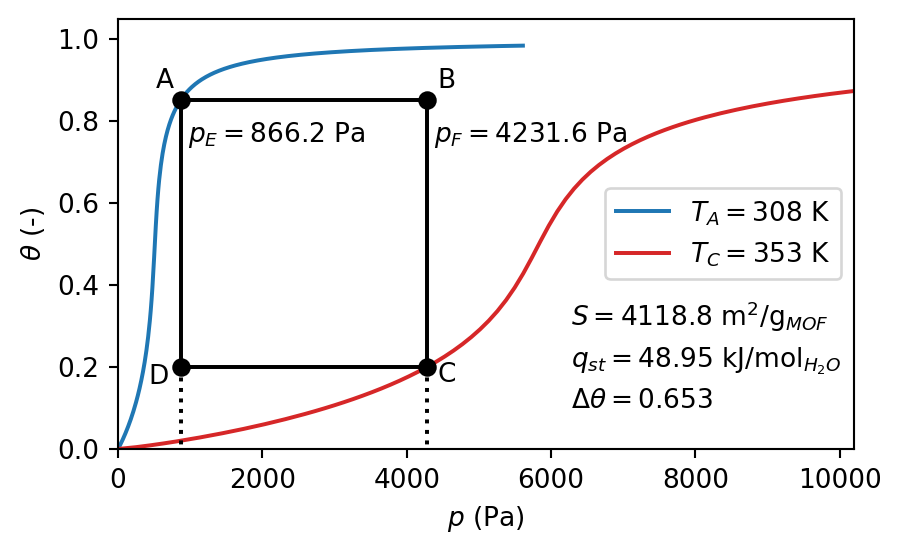

In [64]:
fig, ax = plt.subplots(figsize=(5, 3), dpi = 190)

#plt.figure(figsize=(5,3), dpi = 190)
ax.plot(pressure_b, tetaH, c="tab:blue")
ax.plot(pressure_a, tetaH, c = 'tab:red')


pointA = [pressure_b[xxe[0][0]], tetaH[xxe[0][0]]]
pointB = [pressure_a[xxc[0][0]], tetaH[xxe[0][0]]]
pointC = [pressure_a[xxc[0][0]], tetaH[xxc[0][0]]]
pointD = [pressure_b[xxe[0][0]], tetaH[xxc[0][0]]]

ax.plot(pointA[0], pointA[1], 'o', color='black');
ax.plot(pointB[0], pointB[1], 'o', color='black');
ax.plot(pointC[0], pointC[1], 'o', color='black');
ax.plot(pointD[0], pointD[1], 'o', color='black');

x_AB = [pointA[0], pointB[0]]
y_AB = [pointA[1], pointB[1]]
x_BC = [pointB[0], pointC[0]]
y_BC = [pointB[1], pointC[1]]
x_CD = [pointC[0], pointD[0]]
y_CD = [pointC[1], pointD[1]]
x_DA = [pointD[0], pointA[0]]
y_DA = [pointD[1], pointA[1]]

plt.ylim(0, 1.05)
plt.xlim(0, 10200)

ax.plot(x_AB, y_AB, color = 'k')
ax.plot(x_BC, y_BC, color = 'k')
ax.plot(x_CD, y_CD, color = 'k')
ax.plot(x_DA, y_DA, color = 'k')

ax.plot((pointD[0], pointD[0]), (pointD[1], 0), color = 'black', ls = ':')
ax.plot((pointC[0], pointC[0]), (pointC[1], 0), color = 'black', ls = ':')

ax.annotate('A', xy=(pointA[0], pointA[1]), xytext=(pointA[0]-350, pointA[1]+.03),
            )
ax.annotate('B', xy=(pointB[0], pointB[1]), xytext=(pointB[0]+150, pointB[1]+.03),
            )
ax.annotate('C', xy=(pointC[0], pointC[1]), xytext=(pointC[0]+150, pointC[1]-.035),
            )
ax.annotate('D', xy=(pointD[0], pointD[1]), xytext=(pointD[0]-450, pointD[1]-.04),
            )
ax.annotate('$p_E=$866.2 Pa', xy=(pointD[0]+250, .5), xytext=(pointD[0]+100, 0.75),
            )
ax.annotate('$p_F=$4231.6 Pa', xy=(pointC[0]+250, .5), xytext=(pointC[0]+100, 0.75),
            )
ax.annotate(r'$S=%0.1f$ m$^2$/g$_{MOF}$' %Cap, xy = (pointD[0]+5500, .3), xytext = (pointD[0]+5400, .3)
           )
ax.annotate(r'$\Delta\theta=%0.3f$' %Dteta, xy = (pointD[0]+5500, .1), xytext = (pointD[0]+5400, .1)
           )
ax.annotate(r'$q_{st} = %0.2f$ kJ/mol$_{H_2O}$' %q_st, xy = (pointD[0]+5500, .2), xytext = (pointD[0]+5400, .2)
           )

plt.xlabel('$p$ (Pa)')
plt.ylabel(r'$\theta$ (-)')
ax.legend(['$T_A=$308 K', '$T_C=$353 K'], loc = 'right')
plt.show()